In [94]:
from scipy.optimize import linprog
import numpy as np

![Tabla Max-Min.gif](<attachment:Tabla Max-Min.gif>)
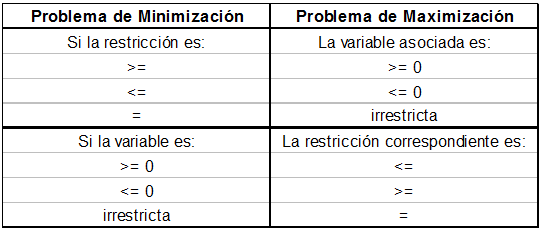

# Ejercicio 1

### Primal:
    Min Z = 7x1 + x2 + 5x3 
    Subject to:   
    x1 -  x2 + 3x3 >= 10 <=> -x1 +  x2 - 3x3 <= -10 
    5x1 + 2x2 - x3 >= 6 <=> -5x1 - 2x2 + x3 <= -6
    x1,   x2,  x3 >= 0 

Calculamos el resultado del problema primal para compararlo con el resultado del problema dual y ver si está bien resuelto.

Como las inequaciones tienen el signo `'>='` tenemos que multiplicar por `'-1'` para cambiar el signo (`<=`)

In [75]:
# Primal
obj_p_ej1 = [7, 1, 5]
lhs_ineq_p_ej1 = [[-1, 1, -3], [-5, -2, 1]]
rhs_ineq_p_ej1 = [-10, -6]
bnd_p_ej1 = [(0,float('inf')), (0,float('inf')), (0,float('inf'))]

opt_p_ej1 = linprog(c=obj_p_ej1, A_ub=lhs_ineq_p_ej1, b_ub=rhs_ineq_p_ej1, bounds=bnd_p_ej1)

In [76]:
print(opt_p_ej1.fun)          # 25.999999903497027
print(opt_p_ej1.success)      # True
print(opt_p_ej1.x, '\n')      # [1.74999999e+00 1.85667727e-08 2.74999999e+00]

26.0
True
[1.75 0.   2.75] 



### Dual:
    Max Z = 10y1 + 6y2
    Subject to: 
    y1 + 5y2 <= 7
    -y1 + 2y2 <= 1
    3y1 -  y2 <= 5
    y1, y2 <= 0

Calculamos el resultado del problema dual y comparamos resultados.

Hacemos la traspuesta de las inequaciones para poder calcular el dual y cambiamos el signo debido al cambio de signo como en el problema primal.

In [77]:
# Dual
obj_d_ej1 = rhs_ineq_p_ej1
lhs_ineq_d_ej1 = np.transpose(lhs_ineq_p_ej1)
lhs_ineq_d_n_ej1 = np.negative(lhs_ineq_d_ej1)
rhs_ineq_d_ej1 = obj_p_ej1
bnd_d_ej1 = [(0,float('inf')), (0,float('inf'))]

opt_d_ej1 = linprog(c = obj_d_ej1, A_ub = lhs_ineq_d_n_ej1, b_ub = rhs_ineq_d_ej1, bounds=bnd_d_ej1)

In [78]:
print(opt_d_ej1.fun)          # -25.9999999215443
print(opt_d_ej1.success)      # True
print(opt_d_ej1.x)            # [1.99999999 1.        ]

-26.0
True
[2. 1.]


Podemos ver que el resultado es el mismo pero con signo negativo (-26), lo que es lo mismo debido a que estamos maximizando.

# Ejercicio 2

### Primal:
    Max Z = 40x1 + 18x2
    Subject to:   
    16x1 + 2x2 <= 700
    6x1 +  3x2 <= 612
    3x1 <= 80
    4x2 <= 120
    x1, x2 <= 0

Calculamos el resultado del problema primal para compararlo con el resultado del problema dual y ver si está bien resuelto.

In [92]:
# Primal
obj_p_ej2 = [2, 4, 3]
lhs_ineq_p_ej2 = [[3, 4, 2], [2, 1, 2], [1, 3, 2]]
rhs_ineq_p_ej2 = [60, 40, 80]
bnd_p_ej2 = [(0,float('inf')), (0,float('inf')), (0,float('inf'))]

opt_p_ej2 = linprog(c=obj_p_ej2, A_ub=lhs_ineq_p_ej2, b_ub=rhs_ineq_p_ej2, bounds=bnd_p_ej2)

In [87]:
print(opt_p_ej2.fun)          # 0.0
print(opt_p_ej2.success)      # True
print(opt_p_ej2.x, '\n')      # [0. 0. 0.]

0.0
True
[0. 0. 0.] 



### Dual:
    Min Z = 700y1 + 612y2 + 80y3 + 120y4
    Subject to: 
    16y1 + 6y2 + 3y3 >= 40
    2y1 + 3y2 + 4y4 >= 18
    y1, y2, y3, y4 >= 0

Partimos del problema dual y tenemos que calcular el primal.

In [96]:
# Dual
obj_d_ej3 = [700, 612, 80, 120]
lhs_ineq_d_ej3 = [[-16, -6, -3, 0], [-2, -3, 0, -4]]
rhs_ineq_d_ej3 = [-40, 18]
bnd_d_ej3 = [(0, float('inf')), (0, float('inf')), (0, float('inf')), (0, float('inf'))]

opt_d_ej3 = linprog(c = obj_d_ej3, A_ub = lhs_ineq_d_ej3, b_ub = rhs_ineq_d_ej3, bounds=bnd_d_ej3)

In [97]:
print(opt_d_ej3.fun)          # 1066.6666666666667
print(opt_d_ej3.success)      # True
print(opt_d_ej3.x)            # [ 0.          0.         13.33333333  0.        ]

1066.6666666666667
True
[ 0.          0.         13.33333333  0.        ]


Podemos ver que el resultado es el mismo (0).

# Ejercicio 3

### Dual:
    Max Z = 700y1 + 612y2 + 80y3 + 120y4
    Subject to:   
    16y1 + 6y2 + 3y3 >= 40
    2y1 + 3y2 + 4y4 >= 18
    y1, y2, y3, y4 >= 0

Calculamos el resultado del problema primal para compararlo con el resultado del problema dual y ver si está bien resuelto.

In [ ]:
# Primal
obj_p_ej2 = [700, 612, 80, 120]
lhs_ineq_p_ej2 = [[-16, -2], [-6, -3], [-3, 0], [0, -4]]
rhs_ineq_p_ej2 = [-40, -18]
bnd_p_ej2 = [(0,float('inf')), (0,float('inf')), (0,float('inf'))]

opt_p_ej2 = linprog(c=obj_p_ej2, A_ub=lhs_ineq_p_ej2, b_ub=rhs_ineq_p_ej2, bounds=bnd_p_ej2)

In [ ]:
print(opt_p_ej2.fun)          # 0.0
print(opt_p_ej2.success)      # True
print(opt_p_ej2.x, '\n')      # [0. 0. 0.]

0.0
True
[0. 0. 0.] 

